In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [2]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    predictions = (sequential_model.predict(X_test_scaled) > 0.5).astype("int32")
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })

    # Convert the model_performance to a DataFrame
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [4]:
FILE_PATH = "/Users/test/Downloads/data.csv"

df = pd.read_csv(FILE_PATH)
df

,Unnamed: 0,company,type,rating,reviewers,age,highly_ratedFOR,critically_ratedFOR
0,0,TCS,IT Services & Consulting,3.8,73.8k Reviews,56 years old,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
1,1,Accenture,IT Services & Consulting,4.0,46.8k Reviews,35 years old,"Company Culture, Skill Development / Learning,...",NaN
2,2,Cognizant,IT Services & Consulting,3.9,42.2k Reviews,30 years old,Skill Development / Learning,Promotions / Appraisal
3,3,Wipro,IT Services & Consulting,3.8,39.6k Reviews,79 years old,Job Security,"Promotions / Appraisal, Salary & Benefits"
4,4,Capgemini,IT Services & Consulting,3.9,34.3k Reviews,57 years old,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits"
...,...,...,...,...,...,...,...,...
9995,9995,Tag Corporation,Industrial Machinery,3.5,73 Reviews,52 years old,"Salary & Benefits, Promotions / Appraisal, Wor...",NaN
9996,9996,vista Processed foods (A OSI GROUP),Analytics & KPO,4.0,73 Reviews,28 years old,"Job Security, Work Life Balance, Company Culture",Promotions / Appraisal
9997,9997,Systematix Infotech,IT Services & Consulting,3.7,73 Reviews,19 years old,"Job Security, Skill Development / Learning",Promotions / Appraisal
9998,9998,GUVI,EdTech,4.0,73 Reviews,10 years old,"Salary & Benefits, Work Life Balance, Company ...",NaN


In [5]:
df.isna().sum()

Unnamed: 0                0
company                   0
type                    409
rating                    0
reviewers                 0
age                     789
highly_ratedFOR          84
critically_ratedFOR    7176
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dropna(inplace=True)

In [9]:
df

,Unnamed: 0,company,type,rating,reviewers,age,highly_ratedFOR,critically_ratedFOR
0,0,TCS,IT Services & Consulting,3.8,73.8k Reviews,56 years old,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
2,2,Cognizant,IT Services & Consulting,3.9,42.2k Reviews,30 years old,Skill Development / Learning,Promotions / Appraisal
3,3,Wipro,IT Services & Consulting,3.8,39.6k Reviews,79 years old,Job Security,"Promotions / Appraisal, Salary & Benefits"
4,4,Capgemini,IT Services & Consulting,3.9,34.3k Reviews,57 years old,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits"
5,5,HDFC Bank,Banking,4.0,34.3k Reviews,30 years old,"Job Security, Skill Development / Learning",Promotions / Appraisal
...,...,...,...,...,...,...,...,...
9987,9987,Srikalahasthi Pipes,Metals & Mining,4.0,73 Reviews,33 years old,"Job Security, Skill Development / Learning","Salary & Benefits, Promotions / Appraisal, Com..."
9991,9991,Hirotec,Auto Components,3.7,73 Reviews,19 years old,Job Security,"Company Culture, Promotions / Appraisal, Work ..."
9993,9993,Corrival Corporate Consultants,Recruitment,4.2,73 Reviews,18 years old,"Company Culture, Work Satisfaction, Job Security",Promotions / Appraisal
9996,9996,vista Processed foods (A OSI GROUP),Analytics & KPO,4.0,73 Reviews,28 years old,"Job Security, Work Life Balance, Company Culture",Promotions / Appraisal


In [11]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [12]:
df

,company,type,rating,reviewers,age,highly_ratedFOR,critically_ratedFOR
0,TCS,IT Services & Consulting,3.8,73.8k Reviews,56 years old,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits"
2,Cognizant,IT Services & Consulting,3.9,42.2k Reviews,30 years old,Skill Development / Learning,Promotions / Appraisal
3,Wipro,IT Services & Consulting,3.8,39.6k Reviews,79 years old,Job Security,"Promotions / Appraisal, Salary & Benefits"
4,Capgemini,IT Services & Consulting,3.9,34.3k Reviews,57 years old,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits"
5,HDFC Bank,Banking,4.0,34.3k Reviews,30 years old,"Job Security, Skill Development / Learning",Promotions / Appraisal
...,...,...,...,...,...,...,...
9987,Srikalahasthi Pipes,Metals & Mining,4.0,73 Reviews,33 years old,"Job Security, Skill Development / Learning","Salary & Benefits, Promotions / Appraisal, Com..."
9991,Hirotec,Auto Components,3.7,73 Reviews,19 years old,Job Security,"Company Culture, Promotions / Appraisal, Work ..."
9993,Corrival Corporate Consultants,Recruitment,4.2,73 Reviews,18 years old,"Company Culture, Work Satisfaction, Job Security",Promotions / Appraisal
9996,vista Processed foods (A OSI GROUP),Analytics & KPO,4.0,73 Reviews,28 years old,"Job Security, Work Life Balance, Company Culture",Promotions / Appraisal


In [15]:
df.dtypes

company                 object
type                    object
rating                 float64
reviewers               object
age                     object
highly_ratedFOR         object
critically_ratedFOR     object
dtype: object

In [19]:
for col in df.columns:
  print("-----------------------")
  print(f'Col is {col}')
  length = df[col].unique()
  if len(length) < 10:
    print(length)

-----------------------
Col is company
-----------------------
Col is type
-----------------------
Col is rating
-----------------------
Col is reviewers
-----------------------
Col is age
-----------------------
Col is highly_ratedFOR
-----------------------
Col is critically_ratedFOR


In [20]:
df["rating"].max()

4.7

In [22]:
df["rating"].min()

2.7

<Axes: xlabel='rating'>

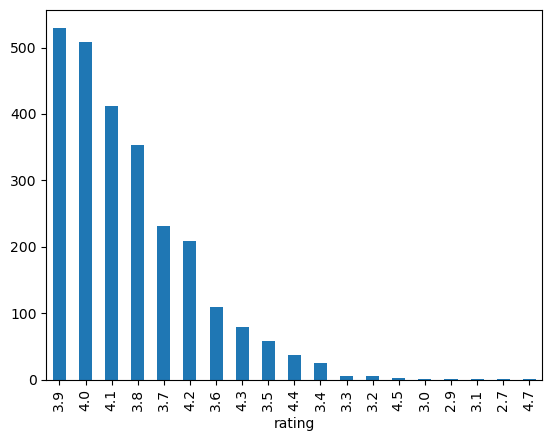

In [25]:
df["rating"].value_counts().plot.bar()

In [31]:
df["rating"] = df["rating"].apply(lambda x: 0 if x >= 0 and x <= 3.0 else 1 if x >3.0 and x<=4.4 else 2)

In [33]:
df["age"] = df["age"].apply(lambda x: int(x.split()[0]))

In [36]:
df["reviewers"] = df["reviewers"].apply(lambda x: float(x.split()[0]) if "k" not in x else float(x.split()[0][:-1]))

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_11253/4182687351.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_11253/4182687351.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_11253/4182687351.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_11253/4182687351.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_11253/4182687351.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_11253/4182687351.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(

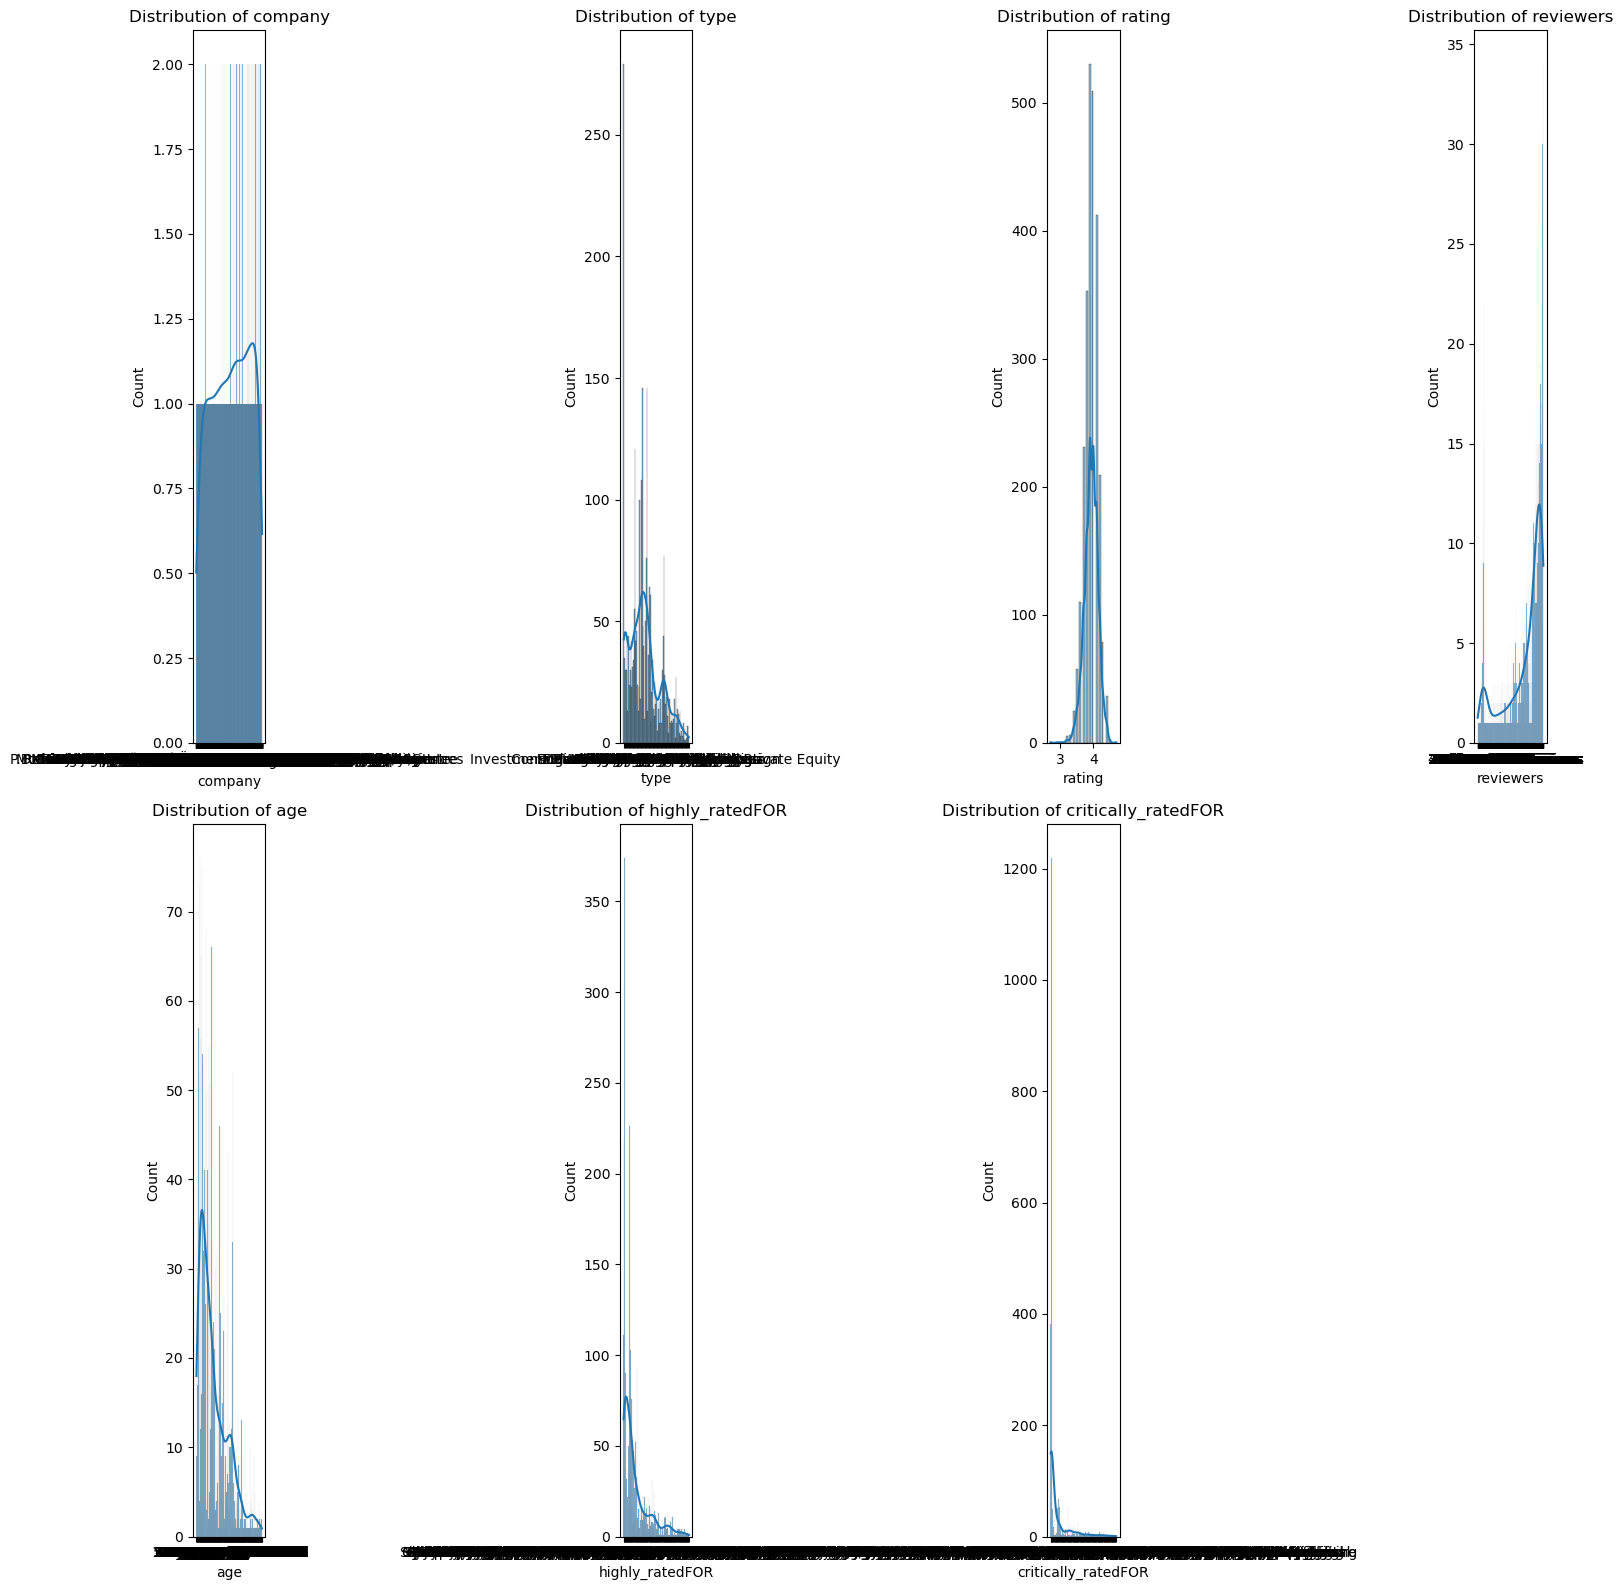

In [30]:
plt.figure(figsize=(16,16))
num_cols = len(df.columns)
num_rows = (num_cols +3)//4
for idx, col in enumerate(df.columns):
  plt.subplot(num_rows, 4, idx+1)
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.tight_layout()

In [41]:
features_to_enode = list(df.select_dtypes(include=("object")).columns)